In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import networkx as nx
from torch_geometric.data import HeteroData
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
import yaml
from yaml import load, dump
import csv
import numpy as np
import dgl
from functools import reduce
import operator
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
import torch

In [3]:
df = pd.read_excel('TvSIUWpP.xlsx')

In [171]:
df['ОГРН']

0       1001601570068
1       1020100694976
2       1020100696791
3       1020201013106
4       1020201433845
            ...      
3140    5177746176493
3141    5177746246904
3142    5177746370929
3143    5177746387451
3144    5187746025539
Name: ОГРН, Length: 3145, dtype: int64

In [7]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved1 = []
for i in df['ОГРН'][:500]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved1.append(do)

In [9]:
dopokved1

[['14.12',
  '13.92',
  '14.11',
  '14.13',
  '14.13.21',
  '14.13.22',
  '14.14',
  '14.14.2',
  '14.19',
  '14.19.4',
  '32.50',
  '46.42',
  '46.42.11',
  '47.51.1',
  '47.53.2',
  '47.99',
  '52.29',
  '64.99.11',
  '68.20.2',
  '68.31.1',
  '68.31.2',
  '68.31.3',
  '68.31.4',
  '73.20.1',
  '95.29'],
 [],
 ['13.94',
  '01.19',
  '01.29',
  '01.61',
  '02.10',
  '02.30.2',
  '13.10.9',
  '13.20.3',
  '13.20.4',
  '14.11',
  '14.19',
  '14.20',
  '15.11.1',
  '15.20',
  '16.10',
  '16.10.9',
  '16.21',
  '16.23',
  '16.24',
  '16.29',
  '23.32',
  '23.6',
  '23.7',
  '27.5',
  '31.0',
  '35.30',
  '35.30.4',
  '41.2',
  '43.2',
  '43.3',
  '45.20',
  '46.4',
  '46.41.1',
  '46.90',
  '47.51.1',
  '49.3',
  '52.21.24',
  '52.24',
  '52.29',
  '55.1',
  '56.29',
  '73.11',
  '77.3',
  '77.39',
  '79.1'],
 [],
 [],
 [],
 [],
 ['22.29.2', '18.12', '18.13', '22.22', '46.90'],
 ['10.13.1',
  '10.11.1',
  '10.11.2',
  '10.11.3',
  '10.11.5',
  '10.13.2',
  '10.13.3',
  '10.13.4',
  '10.13

In [8]:
sp = []
for i in range(len(dopokved1)):
    if dopokved1[i] == []:
        sp.append(i)

In [10]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved2 = []
for i in df['ОГРН'][500:1000]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved2.append(do)

In [11]:
dopokved2

[['20.30', '46.41', '46.41.2', '46.42', '46.49', '46.73.4'],
 [],
 ['23.61',
  '16.10.1',
  '16.23',
  '16.23.1',
  '16.23.2',
  '23.63',
  '23.64',
  '25.1',
  '25.11',
  '25.93',
  '68.2'],
 [],
 ['20.11', '46.49', '47.19', '49.4', '68.20.1', '68.20.2'],
 ['10.84',
  '10.85',
  '10.89',
  '46.38',
  '46.49',
  '47.29',
  '47.91',
  '68.2',
  '77.39'],
 ['22.22',
  '17.12',
  '17.21',
  '17.22',
  '17.29',
  '18.12',
  '18.13',
  '22.21',
  '22.29',
  '46.49.4',
  '46.49.49',
  '68.10',
  '68.20',
  '82.99'],
 ['22.22', '22.29.2', '46.90'],
 ['26.51',
  '26.20',
  '26.30',
  '33.20',
  '43.21',
  '43.29',
  '62.01',
  '63.11',
  '71.12.12',
  '72.19'],
 ['14.13',
  '14.12',
  '14.14',
  '14.19',
  '32.99.1',
  '46.4',
  '47.5',
  '47.75',
  '55.10',
  '56.10',
  '56.10.1',
  '56.10.3',
  '56.29',
  '86.10'],
 [],
 ['22.22', '22.29.2', '22.29.9', '28.99.9', '38.32.53', '46.69.9'],
 [],
 ['26.51.7',
  '27.12',
  '28.99.43',
  '33.12',
  '33.14',
  '33.20',
  '43.21',
  '46.51',
  '46.52

In [12]:
for i in range(len(dopokved2)):
    if dopokved2[i] == []:
        sp.append(500+i)

In [13]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved3 = []
for i in df['ОГРН'][1000:1500]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved3.append(do)

In [14]:
dopokved3

[['10.31',
  '10.32',
  '10.39.1',
  '10.51',
  '10.71',
  '46.31.11',
  '46.31.12',
  '46.31.13',
  '46.31.2',
  '46.33',
  '46.38',
  '47.24'],
 [],
 ['25.1', '46.73.6', '71.12.1'],
 ['22.22',
  '18.12',
  '22.21',
  '22.29',
  '38.32.53',
  '46.12.31',
  '46.49',
  '46.75',
  '47.78.9'],
 [],
 ['23.61', '20.11', '23.6', '23.63', '23.64', '25.11', '33.12'],
 ['25.73',
  '46.74.3',
  '47.78.9',
  '63.91',
  '70.22',
  '71.11.1',
  '72.19',
  '73.11',
  '73.20.1'],
 ['01.41',
  '01.11.1',
  '01.11.2',
  '01.11.3',
  '01.19.1',
  '01.42',
  '01.43.1',
  '01.49.1',
  '01.50',
  '01.61',
  '02.20',
  '16.10.1',
  '36.00.2',
  '41.20',
  '47.9',
  '49.41.2',
  '68.32.2'],
 [],
 [],
 ['10.11.1',
  '10.11.2',
  '10.11.3',
  '10.11.5',
  '10.12.1',
  '10.12.2',
  '10.12.3',
  '10.12.4',
  '10.13.1',
  '10.13.2',
  '10.13.3',
  '10.13.4',
  '10.13.5',
  '10.13.6',
  '10.13.7',
  '10.13.9',
  '35.12',
  '35.13',
  '35.14',
  '35.30.5',
  '46.17.1',
  '46.32.1',
  '46.32.2',
  '46.32.3',
  '46.3

In [15]:
for i in range(len(dopokved3)):
    if dopokved3[i] == []:
        sp.append(1000 + i)

In [16]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved4 = []
for i in df['ОГРН'][1500:2000]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved4.append(do)

In [17]:
dopokved4

[['25.50',
  '01.70',
  '02.10',
  '02.20',
  '02.40',
  '25.61',
  '25.62',
  '25.93',
  '41.20',
  '46.49',
  '46.90',
  '58.11',
  '58.14'],
 [],
 ['22.23',
  '22.29.2',
  '23.12',
  '24.42',
  '32.99.9',
  '35.12',
  '43.34.2',
  '46.19',
  '46.73.5',
  '46.90',
  '47.52.73',
  '47.78.9',
  '52.10.9',
  '77.3'],
 [],
 ['22.21',
  '18.12',
  '20.16',
  '22.23',
  '22.29.2',
  '25.11',
  '25.73',
  '46.12.31',
  '46.90',
  '58.19',
  '68.20.2'],
 ['01.11',
  '01.11.1',
  '01.11.2',
  '01.11.3',
  '01.19.1',
  '01.29',
  '01.41',
  '01.42',
  '01.43.1',
  '01.45.1',
  '01.46',
  '01.61',
  '01.62',
  '03.22.3',
  '10.61.2',
  '46.21',
  '46.21.11',
  '46.21.12',
  '46.21.13',
  '46.21.19',
  '46.23',
  '46.75.1',
  '49.41.1',
  '49.41.2',
  '52.10.3',
  '68.20.1',
  '68.20.2',
  '77.12',
  '77.39.1'],
 [],
 ['10.13',
  '10.11',
  '10.11.2',
  '10.11.3',
  '10.85',
  '30.99',
  '45.20.2',
  '46.11.39',
  '46.17.1',
  '46.38.29',
  '46.90',
  '47.22.2',
  '52.29'],
 [],
 [],
 [],
 [],
 

In [18]:
for i in range(len(dopokved4)):
    if dopokved4[i] == []:
        sp.append(1500 + i)

In [19]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved5 = []
for i in df['ОГРН'][2000:2500]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved5.append(do)

In [20]:
dopokved5

[['23.31', '23.49'],
 ['13.9',
  '01.13.1',
  '13.20.3',
  '13.20.4',
  '13.30.5',
  '13.99.9',
  '20.60',
  '22.2',
  '28.41',
  '28.49.4',
  '28.94.2',
  '28.94.5',
  '28.99',
  '33.12',
  '46.4',
  '46.6',
  '46.7',
  '52.29'],
 ['01.46',
  '01.11.1',
  '01.11.2',
  '01.19.1',
  '01.41',
  '01.42',
  '01.43.1',
  '01.45.1',
  '01.49',
  '01.61',
  '10.11',
  '10.91',
  '46.21.14',
  '46.23',
  '46.32.2',
  '47.22.1',
  '52.10',
  '77.3'],
 ['22.23',
  '23.12',
  '25.11',
  '25.12',
  '41.20',
  '43.12.3',
  '43.21',
  '43.22',
  '43.31',
  '43.32',
  '43.33',
  '43.34.1',
  '43.34.2',
  '43.39',
  '43.91',
  '43.99',
  '43.99.1',
  '43.99.2',
  '43.99.4',
  '43.99.5',
  '43.99.6',
  '46.73.5',
  '46.73.6',
  '46.90',
  '47.52.7',
  '47.52.73',
  '47.59.4',
  '47.99'],
 ['29.10.5',
  '28.12.1',
  '28.13',
  '28.25.1',
  '28.25.2',
  '28.99',
  '29.20',
  '29.20.5',
  '29.31',
  '29.32',
  '33.12',
  '35.30.4',
  '95.11'],
 ['10.62.1',
  '10.61.2',
  '10.61.3',
  '10.61.4',
  '10.62.2

In [21]:
for i in range(len(dopokved5)):
    if dopokved5[i] == []:
        sp.append(2000 + i)

In [22]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved6 = []
for i in df['ОГРН'][2500:]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved6.append(do)

In [23]:
dopokved6

[['28.92',
  '02.40',
  '16.29.1',
  '18.11',
  '18.12',
  '18.13',
  '18.14',
  '25.61',
  '25.62',
  '27.40',
  '28.12',
  '28.15',
  '28.22',
  '28.41',
  '28.91',
  '28.99',
  '29.10.4',
  '29.10.5',
  '29.20',
  '29.20.5',
  '31.09',
  '33.12',
  '41.20',
  '42.11',
  '42.99',
  '43.99',
  '45.20',
  '45.3',
  '46.43',
  '46.49',
  '46.61',
  '46.62',
  '46.69',
  '46.73',
  '46.74',
  '46.76',
  '46.77',
  '46.90',
  '47.52.73',
  '47.61',
  '52.24',
  '52.29',
  '58.11',
  '58.13',
  '58.14',
  '58.19',
  '59.20',
  '70.22',
  '73.11',
  '77.11',
  '77.31',
  '77.32',
  '77.39.11',
  '77.39.2'],
 ['23.61',
  '23.63',
  '23.64',
  '23.69',
  '25.11',
  '41.20',
  '43.91',
  '43.99',
  '46.13',
  '46.19',
  '46.61',
  '46.62',
  '46.63',
  '46.69',
  '46.73',
  '46.74',
  '47.52',
  '49.41',
  '52.29',
  '77.39.2',
  '77.39.29'],
 ['10.13',
  '10.11',
  '10.11.1',
  '10.11.2',
  '10.11.3',
  '10.12',
  '10.12.1',
  '10.12.2',
  '10.12.3',
  '10.12.4',
  '10.71',
  '10.71.1',
  '10

In [24]:
for i in range(len(dopokved6)):
    if dopokved6[i] == []:
        sp.append(2500 + i)

In [25]:
len(sp)

598

In [32]:
dopok = dopokved1+dopokved2+dopokved3+dopokved4+dopokved5+dopokved6

In [33]:
dopok

[['14.12',
  '13.92',
  '14.11',
  '14.13',
  '14.13.21',
  '14.13.22',
  '14.14',
  '14.14.2',
  '14.19',
  '14.19.4',
  '32.50',
  '46.42',
  '46.42.11',
  '47.51.1',
  '47.53.2',
  '47.99',
  '52.29',
  '64.99.11',
  '68.20.2',
  '68.31.1',
  '68.31.2',
  '68.31.3',
  '68.31.4',
  '73.20.1',
  '95.29'],
 [],
 ['13.94',
  '01.19',
  '01.29',
  '01.61',
  '02.10',
  '02.30.2',
  '13.10.9',
  '13.20.3',
  '13.20.4',
  '14.11',
  '14.19',
  '14.20',
  '15.11.1',
  '15.20',
  '16.10',
  '16.10.9',
  '16.21',
  '16.23',
  '16.24',
  '16.29',
  '23.32',
  '23.6',
  '23.7',
  '27.5',
  '31.0',
  '35.30',
  '35.30.4',
  '41.2',
  '43.2',
  '43.3',
  '45.20',
  '46.4',
  '46.41.1',
  '46.90',
  '47.51.1',
  '49.3',
  '52.21.24',
  '52.24',
  '52.29',
  '55.1',
  '56.29',
  '73.11',
  '77.3',
  '77.39',
  '79.1'],
 [],
 [],
 [],
 [],
 ['22.29.2', '18.12', '18.13', '22.22', '46.90'],
 ['10.13.1',
  '10.11.1',
  '10.11.2',
  '10.11.3',
  '10.11.5',
  '10.13.2',
  '10.13.3',
  '10.13.4',
  '10.13

In [85]:
sp

[1,
 3,
 4,
 5,
 6,
 13,
 15,
 17,
 20,
 23,
 29,
 38,
 47,
 48,
 49,
 50,
 51,
 52,
 62,
 64,
 65,
 66,
 69,
 70,
 71,
 76,
 77,
 78,
 85,
 91,
 92,
 93,
 94,
 96,
 101,
 102,
 106,
 108,
 117,
 119,
 125,
 126,
 127,
 128,
 129,
 131,
 133,
 146,
 155,
 158,
 166,
 167,
 171,
 172,
 175,
 180,
 182,
 184,
 187,
 192,
 193,
 195,
 196,
 198,
 200,
 205,
 206,
 212,
 216,
 219,
 225,
 226,
 228,
 230,
 243,
 247,
 251,
 255,
 256,
 258,
 264,
 272,
 277,
 279,
 281,
 284,
 292,
 293,
 294,
 296,
 314,
 315,
 316,
 317,
 320,
 324,
 326,
 327,
 332,
 338,
 339,
 340,
 341,
 342,
 343,
 345,
 346,
 347,
 348,
 352,
 353,
 358,
 361,
 364,
 366,
 371,
 373,
 375,
 383,
 395,
 400,
 402,
 411,
 418,
 422,
 424,
 426,
 429,
 433,
 436,
 438,
 439,
 440,
 445,
 447,
 452,
 456,
 463,
 467,
 472,
 476,
 488,
 491,
 494,
 497,
 501,
 503,
 510,
 512,
 515,
 519,
 526,
 529,
 534,
 540,
 547,
 550,
 557,
 562,
 569,
 576,
 580,
 582,
 594,
 596,
 598,
 607,
 609,
 613,
 626,
 627,
 629,
 632,
 

In [26]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved7 = []
for i in df['ОГРН'][sp]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved7.append(do)

In [44]:
dopokved7

[['22.22',
  '17.21',
  '18.12',
  '24.42',
  '46.18.99',
  '46.19',
  '46.49.49',
  '46.90',
  '47.91',
  '47.99',
  '49.4',
  '52.10',
  '53.20.31',
  '62.09',
  '82.92'],
 ['03.22.1',
  '01.11',
  '01.11.1',
  '01.11.2',
  '01.11.3',
  '01.19.1',
  '01.41',
  '01.41.12',
  '01.43.1',
  '01.49.1',
  '01.49.7',
  '01.50',
  '01.61',
  '01.70',
  '03.12',
  '03.22.5',
  '10.20',
  '46.38.1',
  '47.23.1',
  '47.78.9',
  '49.4',
  '55.10',
  '68.20.2'],
 ['29.20',
  '25.1',
  '25.2',
  '25.5',
  '28.1',
  '28.2',
  '29.20.5',
  '29.31',
  '29.32',
  '45.19.1',
  '45.19.4',
  '45.20',
  '45.3',
  '45.31.1',
  '45.31.2',
  '46.6',
  '46.61.1',
  '46.69.1',
  '46.73.4',
  '47.5',
  '47.9',
  '49.4',
  '52.29',
  '68.1',
  '68.2',
  '68.20.2',
  '68.3',
  '77.3'],
 ['29.31',
  '13.92',
  '25.62',
  '27.12',
  '29.32',
  '32.91',
  '46.90',
  '49.41.2',
  '56.29'],
 ['27.40', '25.73', '25.91', '25.93.1', '25.94'],
 ['30.99',
  '25.11',
  '25.29',
  '28.21',
  '28.22.1',
  '28.22.2',
  '28.22.

In [112]:
sp1 = []
sp11 = []
for i in range(len(dopokved7)):
    if dopokved7[i] == []:
        sp1.append(sp[i])
        sp11.append(i)

In [52]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved8 = []
for i in df['ОГРН'][sp1]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved8.append(do)

In [103]:
sp2 = []
sp22 = []
for i in range(len(dopokved8)):
    if dopokved8[i] == []:
        sp2.append(sp1[i])
        sp22.append(i)

In [ ]:
pattern = r'\b\d+\.\d+\.?\d*\b'
dopokved9 = []
for i in df['ОГРН'][sp2]:
    do = []
    url = f'https://companium.ru/id/{i}/activity'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    numbs = soup.find_all('td')
    for numb in numbs:
        do.extend(re.findall(pattern, numb.text))
    dopokved9.append(do)

In [105]:
sp3 = []
for i in range(len(dopokved9)):
    if dopokved9[i] == []:
        sp3.append(i)

In [106]:
sp3

[]

In [108]:
for i in sp22:
    dopokved8[i] = dopokved9[sp22.index(i)]

In [110]:
for i in sp11:
    dopokved7[i] = dopokved8[sp11.index(i)]

In [115]:
for i in sp:
    dopok[i] = dopokved7[sp.index(i)]

In [194]:
df['Доп. ОКВЭД'] = dopok

In [195]:
df

,Сокращенное наименование,Полное наименование,ОГРН,ИНН,КПП,Телефоны,Email,Веб-сайт,Статус,Дата регистрации,...,Выручка (2022),Чистая прибыль (2022),Капитал (2023),Выручка (2023),Чистая прибыль (2023),Специальные налоговые режимы,Уплаченные налоги,Сумма контрактов - заказчик,Сумма контрактов - поставщик,Доп. ОКВЭД
0,"АО ""АЗНАКАЙ КИЕМНЭРЕ""","АКЦИОНЕРНОЕ ОБЩЕСТВО ""АЗНАКАЙ КИЕМНЭРЕ""",1001601570068,1643002359,164301001,"+78559277979, +78555925212, +78551177484, +785...","arnfabrica@rambler.ru, fabrika22@mail.ru, fabr...",NaN,Действующее,1998-04-04,...,6.310210e+08,63137000,429063000,852617000,147717000,NaN,74315372.0,0,367246,"[14.12, 13.92, 14.11, 14.13, 14.13.21, 14.13.2..."
1,"ООО ""ЛИГА-ПАК""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛИГА...",1020100694976,105030605,231201001,"+79385379090, +78772564267, +78612012555, +786...","tender@ligapaсk.ru, office@ligapack.ru, 1501@l...",http://ligapack.ru,Действующее,1999-12-17,...,1.956420e+09,83863000,252308000,1950193000,8318000,NaN,99973004.0,0,7459762,"[22.22, 17.21, 18.12, 24.42, 46.18.99, 46.19, ..."
2,"ЗАО ШПАГАТНАЯ ФАБРИКА ""МАЙКОПСКАЯ""",ЗАКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ШПАГАТНАЯ ФАБРИК...,1020100696791,105026430,10501001,"+78772525165, +78772544378, +78772540698",r77701@mail.ru,http://maykopkanat.ru,Действующее,1997-08-18,...,3.666250e+08,85715000,110448000,309894000,64499000,NaN,62350018.0,0,0,"[13.94, 01.19, 01.29, 01.61, 02.10, 02.30.2, 1..."
3,"ООО ""КАРМАНОВСКИЙ РЫБХОЗ""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КАРМ...",1020201013106,264001751,23101001,"+73478367409, +73472660373, +73472412756, +734...","krhufa@mai.ru, karman_ribhoz@mail.ru",NaN,Действующее,1996-07-09,...,2.796480e+08,21628000,542334000,297788000,23976000,ЕСХН,17807039.0,0,127886143,"[03.22.1, 01.11, 01.11.1, 01.11.2, 01.11.3, 01..."
4,"ООО ""АВТОСБЫТ""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АВТО...",1020201433845,253006620,26401001,"+73478320035, +73478320822, +73478321288","0253006620_026401001@eo.tensor.ru, galina-avt...",http://avtosbyt.ru,Действующее,1999-10-07,...,8.541500e+08,130353000,666764000,1214157000,175707000,NaN,94019422.0,0,237496696,"[29.20, 25.1, 25.2, 25.5, 28.1, 28.2, 29.20.5,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,"ООО НПФ ""АВАНГАРД-СИСТЕМАТЕХНИКА""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ НПФ ""...",5177746176493,7727333781,772701001,+79689162511,NaN,http://npfas.ru,Действующее,2017-11-07,...,1.447231e+09,60661000,188588000,1431157000,28636000,NaN,38046423.0,0,0,"[33.20, 26.51, 26.51.5, 26.51.8, 33.12, 33.13,..."
3141,"ООО ""СЫРКОФФ""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СЫРК...",5177746246904,7751126627,775101001,"+74956400187, +74955569676, +74964698092","ooosirkoff@gmail.ru, ooosirkoff@gmail.com",http://сырок.рф,Действующее,2017-11-23,...,1.954092e+09,11307000,37656000,2730804000,28501000,NaN,16065363.0,0,0,"[10.51.9, 10.41.5, 10.41.6, 10.51.1, 10.51.2, ..."
3142,"ООО ""ПЛАСТ""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПЛАСТ""",5177746370929,9729206197,772901001,"+78003505360, +78003336475, +74997023391, +749...","shiti56@mail.ru, zakaz@elki.pro, e-dmitrii@mai...","http://christmasdivision.ru, http://morozco.ru",Действующее,2017-12-22,...,3.286740e+08,2376000,33125000,595513000,4500000,NaN,21870642.0,0,0,"[22.29.2, 13.92, 14.13, 14.19.11, 14.19.21, 22..."
3143,"ООО ""ПТСК""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОФ...",5177746387451,7714421342,771401001,+79374062721,ivt@pt-msk.ru,http://npt-msk.ru,Действующее,2017-12-26,...,1.850912e+09,445045000,2751887000,3518401000,1113078000,NaN,177843755.0,0,0,"[26.30.15, 26.11, 26.30, 26.30.1, 26.30.11, 26..."


In [196]:
data = df

In [197]:
sttr = data['Код ОКВЭД-2']
aces = [suit +'.' for suit in sttr]
data['Код ОКВЭД-2'] = aces

In [198]:
newdop = []
for i in data['Доп. ОКВЭД']:
    code = []
    for y in i[1:]:
        code.append(y + '.')
    newdop.append(code)

In [200]:
newdop

[['13.92.',
  '14.11.',
  '14.13.',
  '14.13.21.',
  '14.13.22.',
  '14.14.',
  '14.14.2.',
  '14.19.',
  '14.19.4.',
  '32.50.',
  '46.42.',
  '46.42.11.',
  '47.51.1.',
  '47.53.2.',
  '47.99.',
  '52.29.',
  '64.99.11.',
  '68.20.2.',
  '68.31.1.',
  '68.31.2.',
  '68.31.3.',
  '68.31.4.',
  '73.20.1.',
  '95.29.'],
 ['17.21.',
  '18.12.',
  '24.42.',
  '46.18.99.',
  '46.19.',
  '46.49.49.',
  '46.90.',
  '47.91.',
  '47.99.',
  '49.4.',
  '52.10.',
  '53.20.31.',
  '62.09.',
  '82.92.'],
 ['01.19.',
  '01.29.',
  '01.61.',
  '02.10.',
  '02.30.2.',
  '13.10.9.',
  '13.20.3.',
  '13.20.4.',
  '14.11.',
  '14.19.',
  '14.20.',
  '15.11.1.',
  '15.20.',
  '16.10.',
  '16.10.9.',
  '16.21.',
  '16.23.',
  '16.24.',
  '16.29.',
  '23.32.',
  '23.6.',
  '23.7.',
  '27.5.',
  '31.0.',
  '35.30.',
  '35.30.4.',
  '41.2.',
  '43.2.',
  '43.3.',
  '45.20.',
  '46.4.',
  '46.41.1.',
  '46.90.',
  '47.51.1.',
  '49.3.',
  '52.21.24.',
  '52.24.',
  '52.29.',
  '55.1.',
  '56.29.',
  '73.11.',

In [201]:
data['Доп. ОКВЭД'] = newdop

In [202]:
data.to_excel('datafinalll2.xlsx')

In [88]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,src_id,dst_id,Unnamed: 3,Unnamed: 4
0,0,0,0,1643002359,13.92.,NaN,NaN
1,1,1,1,1643002359,14.11.,NaN,NaN
2,2,2,2,1643002359,14.13.,NaN,NaN
3,3,3,3,1643002359,14.13.21.,NaN,NaN
4,4,4,4,1643002359,14.13.22.,NaN,NaN
...,...,...,...,...,...,...,...
57023,57023,57023,57023,7723683270,74.90.94.,NaN,NaN
57024,57024,57024,57024,7717630552,71.12.54.,NaN,NaN
57025,57025,57025,57025,7723684394,68.32.3.,NaN,NaN
57026,57026,57026,57026,9729042527,23.20.9.,NaN,NaN


In [82]:
innd = []
lst = list(df['src_id'].values)
for i in range(len(lst)):
    if '.' in str(lst[i])[:3]:
        innd.append(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

347
347
347
348
348
348
348
348
348
348
348
348
348
349
349
349
349
349
349
349
349
349
349
350
350
350
350
350
350
350
350
350
350
351
351
351
351
351
351
351
351
351
351
352
352
352
352
352
352
352
352
352
352
353
353
353
353
353
353
353
353
353
353
354
354
354
354
354
354
354
354
354
354
355
355
355
355
355
355
355
355
355
355
356
356
356
356
356
356
356
356
356
356
357
357
357
357
357
357
357
357
357
357
358
358
358
358
358
358
358
358
358
358
359
359
359
359
359
359
359
359
359
359
360
360
360
360
360
360
360
360
360
360
361
361
361
361
361
361
361
361
361
361
362
362
362
362
362
362
362
362
362
362
363
363
363
363
363
363
363
363
363
363
364
364
364
364
364
364
364
364
364
364
365
365
365
365
365
365
365
365
365
365
366
366
366
366
366
366
366
366
366
366
367
367
367
367
367
367
367
367
367
367
368
368
368
368
368
368
368
368
368
368
369
369
369
369
369
369
369
369
369
369
370
370
370
370
370
370
370
370
370
370
371
371
371
371
371
371
371
371
371
371
372
372
372
372
372
372
372


604
604
604
604
604
604
605
605
605
605
605
605
605
605
605
605
606
606
606
606
606
606
606
606
606
606
607
607
607
607
607
607
607
607
607
607
608
608
608
608
608
608
608
608
608
608
609
609
609
609
609
609
609
609
609
609
610
610
610
610
610
610
610
610
610
610
611
611
611
611
611
611
611
611
611
611
612
612
612
612
612
612
612
612
612
612
613
613
613
613
613
613
613
613
613
613
614
614
614
614
614
614
614
614
614
614
615
615
615
615
615
615
615
615
615
615
616
616
616
616
616
616
616
616
616
616
617
617
617
617
617
617
617
617
617
617
618
618
618
618
618
618
618
618
618
618
619
619
619
619
619
619
619
619
619
619
620
620
620
620
620
620
620
620
620
620
621
621
621
621
621
621
621
621
621
621
622
622
622
622
622
622
622
622
622
622
623
623
623
623
623
623
623
623
623
623
624
624
624
624
624
624
624
624
624
624
625
625
625
625
625
625
625
625
625
625
626
626
626
626
626
626
626
626
626
626
627
627
627
627
627
627
627
627
627
627
628
628
628
628
628
628
628
628
628
628
629
629
629
629


943
943
943
943
943
943
943
943
944
944
944
944
944
944
944
944
944
944
945
945
945
945
945
945
945
945
945
945
946
946
946
946
946
946
946
946
946
946
947
947
947
947
947
947
947
947
947
947
948
948
948
948
948
948
948
948
948
948
949
949
949
949
949
949
949
949
949
949
950
950
950
950
950
950
950
950
950
950
951
951
951
951
951
951
951
951
951
951
952
952
952
952
952
952
952
952
952
952
953
953
953
953
953
953
953
953
953
953
954
954
954
954
954
954
954
954
954
954
955
955
955
955
955
955
955
955
955
955
956
956
956
956
956
956
956
956
956
956
957
957
957
957
957
957
957
957
957
957
958
958
958
958
958
958
958
958
958
958
959
959
959
959
959
959
959
959
959
959
960
960
960
960
960
960
960
960
960
960
961
961
961
961
961
961
961
961
961
961
962
962
962
962
962
962
962
962
962
962
963
963
963
963
963
963
963
963
963
963
964
964
964
964
964
964
964
964
964
964
965
965
965
965
965
965
965
965
965
965
966
966
966
966
966
966
966
966
966
966
967
967
967
967
967
967
967
967
967
967
968
968


124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
125
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127
127


154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
157
157
157
157
157
157
157
157
157
157
157


184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
186
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187
187


218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
218
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
219
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220


242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
245


274
274
274
274
274
274
274
274
274
274
274
274
274
274
274
274
274
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
276
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277
277


304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
304
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306
306


335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337


365
365
365
365
365
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
366
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
367
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368
368


397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399


428
428
428
428
428
428
428
428
428
428
428
428
428
428
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431


458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
458
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
459
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460
460


494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
494
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
495
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
496
497
497
497
497
497
497
497
497
497
497
497
497


526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
526
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
527
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
528
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529
529


559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
562
562
562
562
562
562
562
562
562
562


In [83]:
innd

[46260,
 46261,
 46262,
 46263,
 46264,
 46265,
 51929,
 51930,
 51931,
 51932,
 51935,
 51936,
 51937,
 51938,
 51939,
 51940,
 51941,
 51942,
 51943,
 51944,
 51945,
 51946,
 51947,
 51948,
 51949,
 51952,
 51953,
 51954,
 51955,
 51956,
 51957,
 51958,
 51959,
 51960,
 51961,
 51962,
 51963,
 51964,
 51965,
 51966,
 51967,
 51968,
 51969,
 51970,
 51971,
 51972,
 51973,
 51974,
 51975,
 51976,
 51977,
 51978,
 51979,
 51980,
 51981,
 51982,
 51983,
 51984,
 51985,
 51986,
 51987,
 51988,
 51991,
 51992,
 51993,
 51994,
 51995,
 51996,
 51997,
 51998,
 51999,
 52000,
 52001,
 52002,
 52003,
 52004,
 52005,
 52006,
 52007,
 52008,
 52009,
 52010,
 52011,
 52012,
 52013,
 52014,
 52015,
 52016,
 52017,
 52018,
 52025,
 52026,
 52027,
 52030,
 52031,
 52032,
 52033,
 52034,
 52035,
 52036,
 52037,
 52038,
 52039,
 52040,
 52041,
 52042,
 52043,
 52044,
 52045,
 52046,
 52047,
 52048,
 52049,
 52052,
 52053,
 52054,
 52055,
 52056,
 52057,
 52058,
 52059,
 52060,
 52061,
 52062,
 52063,


In [84]:
valinn = df['dst_id'].iloc[innd].values
valcod = df['src_id'].iloc[innd].values

In [85]:
df.loc[innd, 'src_id'] = valinn

In [86]:
df.loc[innd, 'dst_id'] = valcod

In [7]:
df

,Unnamed: 0,src_id,dst_id,Unnamed: 3,Unnamed: 4
0,0,1643002359,13.92.,NaN,NaN
1,1,1643002359,14.11.,NaN,NaN
2,2,1643002359,14.13.,NaN,NaN
3,3,1643002359,14.13.21.,NaN,NaN
4,4,1643002359,14.13.22.,NaN,NaN
...,...,...,...,...,...
57023,57023,7723683270,74.90.94.,NaN,NaN
57024,57024,7717630552,71.12.54.,NaN,NaN
57025,57025,7723684394,68.32.3.,NaN,NaN
57026,57026,9729042527,23.20.9.,NaN,NaN


In [89]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [90]:
df.set_index('src_id', inplace = True)

In [91]:
df.to_csv('edges_2.csv')

In [94]:
df = pd.read_csv('edges_2.csv')
df

,src_id,dst_id
0,1643002359,13.92.
1,1643002359,14.11.
2,1643002359,14.13.
3,1643002359,14.13.21.
4,1643002359,14.13.22.
...,...,...
57023,7723683270,74.90.94.
57024,7717630552,71.12.54.
57025,7723684394,68.32.3.
57026,9729042527,23.20.9.


In [95]:
d1 = df['dst_id']
d2 = df['src_id']
newdf = pd.DataFrame({'src_id': d1, 'dst_id': d2})
newdf.set_index('src_id', inplace = True)
newdf

,dst_id
src_id,
13.92.,1643002359
14.11.,1643002359
14.13.,1643002359
14.13.21.,1643002359
14.13.22.,1643002359
...,...
74.90.94.,7723683270
71.12.54.,7717630552
68.32.3.,7723684394


In [96]:
newdf.to_csv('edges_3.csv')

In [203]:
out = reduce(operator.concat, newdop)

In [204]:
len(out)

57028

In [205]:
unidops = list(set(out))
len(unidops)

1959

In [206]:
uniokved = data['Код ОКВЭД-2'].unique()
len(uniokved)

420

In [207]:
unicodes = list(set(uniokved.tolist() + unidops))

In [208]:
len(unicodes)

1970

In [251]:
d1 = d['dst_id']
d2 = d['src_id']
newdf = pd.DataFrame({'src_id': d1, 'dst_id': d2})
newdf.set_index('src_id', inplace = True)
newdf

,dst_id
src_id,
13.92.,1643002359
14.11.,1643002359
14.13.,1643002359
14.13.21.,1643002359
14.13.22.,1643002359
...,...
74.90.94.,7723683270
71.12.54.,7717630552
68.32.3.,7723684394


In [252]:
newdf.to_csv('edges_4.csv')

In [28]:
G = nx.Graph()

In [29]:
inns = list(data['ИНН'])

In [30]:
for i in inns:
    G.add_node(i, type = 'сompany', region = data['Регион'].loc[data['ИНН'] == i].values[0], ssch = data['ССЧ'].loc[data['ИНН'] == i].values[0], chartercap = data['Уставный капитал'].loc[data['ИНН'] == i].values[0], cap = data['Капитал (2023)'].loc[data['ИНН'] == i].values[0], rev = data['Выручка (2023)'].loc[data['ИНН'] == i].values[0], netprofit = data['Чистая прибыль (2023)'].loc[data['ИНН'] == i].values[0])

In [31]:
G.nodes(data = True)

NodeDataView({1643002359: {'type': 'сompany', 'region': 'Татарстан, республика', 'ssch': 215, 'chartercap': 1300000, 'cap': 429063000, 'rev': 852617000, 'netprofit': 147717000}, 105030605: {'type': 'сompany', 'region': 'Краснодарский край', 'ssch': 217, 'chartercap': 16500000, 'cap': 252308000, 'rev': 1950193000, 'netprofit': 8318000}, 105026430: {'type': 'сompany', 'region': 'Адыгея, республика', 'ssch': 116, 'chartercap': 8500, 'cap': 110448000, 'rev': 309894000, 'netprofit': 64499000}, 264001751: {'type': 'сompany', 'region': 'Башкортостан, республика', 'ssch': 111, 'chartercap': 855574, 'cap': 542334000, 'rev': 297788000, 'netprofit': 23976000}, 253006620: {'type': 'сompany', 'region': 'Башкортостан, республика', 'ssch': 20, 'chartercap': 10000, 'cap': 666764000, 'rev': 1214157000, 'netprofit': 175707000}, 255000261: {'type': 'сompany', 'region': 'Башкортостан, республика', 'ssch': 174, 'chartercap': 6080500, 'cap': 21531000, 'rev': 172733000, 'netprofit': 7355000}, 256010216: {'ty

In [32]:
for i in uniokved:
    G.add_node(i, type = 'OKVED')

In [33]:
for i in inns:
    G.add_edge(i, data['Код ОКВЭД-2'].loc[data['ИНН'] == i].values[0])

In [34]:
data['Код ОКВЭД-2'].loc[data['ИНН'] == 4634005849].values[0]

'10.73.1.'

In [35]:
len(G.edges())

3145

In [36]:
len(G.nodes())

3565

In [37]:
list(G.edges())

[(1643002359, '14.12.'),
 (105030605, '22.22.'),
 (105026430, '13.94.'),
 (264001751, '03.22.1.'),
 (253006620, '29.20.'),
 (255000261, '29.31.'),
 (256010216, '27.40.'),
 (258008558, '22.29.2.'),
 (265003744, '10.13.1.'),
 (248003712, '24.41.'),
 (268009582, '17.29.'),
 (269001177, '25.30.2.'),
 (269013599, '23.61.'),
 (270012769, '30.99.'),
 (273037634, '23.52.2.'),
 (273032724, '22.22.'),
 (274010931, '20.15.'),
 (277010224, '25.29.'),
 (308000540, '01.47.'),
 (512002579, '01.21.'),
 (517009514, '32.99.8.'),
 (548009923, '11.01.1.'),
 (700000327, '11.07.'),
 (716001735, '10.51.'),
 (901014009, '01.11.'),
 (901017433, '27.12.'),
 (901013630, '23.63.'),
 (901047011, '13.99.'),
 (909009071, '13.95.'),
 (910003701, '23.52.2.'),
 (1215027942, '25.50.2.'),
 (1215054488, '25.12.'),
 (1310086360, '01.41.'),
 (1314020521, '27.90.'),
 (1323008834, '10.51.'),
 (1327039569, '28.99.9.'),
 (1328198480, '23.32.'),
 (1328167027, '23.32.'),
 (1328035951, '29.20.'),
 (1502013069, '27.12.'),
 (1639015

In [38]:
nx.write_edgelist(G, 'edges.csv', delimiter = ',', data = False)

In [39]:
le = LabelEncoder()
region = le.fit_transform(data['Регион'])

In [40]:
df2 = data[['ССЧ', 'Уставный капитал', 'Капитал (2023)', 'Выручка (2023)', 'Чистая прибыль (2023)']]
df2['Регион'] = region

C:\Users\8BAD~1\AppData\Local\Temp/ipykernel_16416/2104157964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Регион'] = region


In [41]:
df2

,ССЧ,Уставный капитал,Капитал (2023),Выручка (2023),Чистая прибыль (2023),Регион
0,215,1300000,429063000,852617000,147717000,50
1,217,16500000,252308000,1950193000,8318000,19
2,116,8500,110448000,309894000,64499000,0
3,111,855574,542334000,297788000,23976000,3
4,20,10000,666764000,1214157000,175707000,3
...,...,...,...,...,...,...
3140,19,25000000,188588000,1431157000,28636000,28
3141,124,10000,37656000,2730804000,28501000,28
3142,124,19885500,33125000,595513000,4500000,28
3143,16,1000000,2751887000,3518401000,1113078000,28


In [42]:
df2 = (df2 - df2.mean())/(df2.std())
df2.astype(np.float32)
df2

,ССЧ,Уставный капитал,Капитал (2023),Выручка (2023),Чистая прибыль (2023),Регион
0,1.081426,-0.044762,-0.053616,-0.074854,0.278507,1.225133
1,1.111162,-0.027162,-0.252821,1.574589,-0.514089,-0.759322
2,-0.390525,-0.046257,-0.412699,-0.890461,-0.194655,-1.975600
3,-0.464866,-0.045276,0.074041,-0.908654,-0.425061,-1.783556
4,-1.817872,-0.046255,0.214275,0.468470,0.437653,-1.783556
...,...,...,...,...,...,...
3140,-1.832740,-0.017320,-0.324634,0.794579,-0.398565,-0.183190
3141,-0.271580,-0.046255,-0.494736,2.747696,-0.399332,-0.183190
3142,-0.271580,-0.023242,-0.499843,-0.461231,-0.535798,-0.183190
3143,-1.877345,-0.045109,2.564230,3.931301,5.767368,-0.183190


In [43]:
feats = []
for i in range(len(df2)):
    s = df2[['ССЧ', 'Уставный капитал', 'Капитал (2023)', 'Выручка (2023)', 'Чистая прибыль (2023)']].values[i]
    feats.append(','.join(str(x) for x in s))

In [44]:
df2['feat'] = feats
df2.drop(columns = ['Регион', 'ССЧ', 'Уставный капитал', 'Капитал (2023)', 'Выручка (2023)', 'Чистая прибыль (2023)'], axis = 0, inplace = True)

In [45]:
df2.insert(0, 'node_id', data['ИНН'])
df2.set_index('node_id', inplace = True)
df2

,feat
node_id,
1643002359,"1.0814260643805291,-0.044761543644482565,-0.05..."
105030605,"1.1111624564301272,-0.027161736978993035,-0.25..."
105026430,"-0.3905253420745793,-0.04625694827004044,-0.41..."
264001751,"-0.46486632219857466,-0.04527613651797709,0.07..."
253006620,"-1.8178721604552905,-0.04625521144701424,0.214..."
...,...
7727333781,"-1.8327403564800895,-0.017319739830528494,-0.3..."
7751126627,"-0.27157977387618665,-0.04625521144701424,-0.4..."
9729206197,"-0.27157977387618665,-0.023241727408860484,-0...."


In [4]:
dataset = dgl.data.CSVDataset('C:/Users/Алена/Downloads/hetero_dataset')
hetero_graph = dataset[0]
print(hetero_graph)
hetero_graph.nodes['company'].data

Done loading data from cached files.
Graph(num_nodes={'company': 3145, 'okved': 1970},
      num_edges={('company', 'alsohas', 'okved'): 57028, ('company', 'has', 'okved'): 3145, ('okved', 'alsoobtained_by', 'company'): 57028, ('okved', 'obtained_by', 'company'): 3145},
      metagraph=[('company', 'okved', 'alsohas'), ('company', 'okved', 'has'), ('okved', 'company', 'alsoobtained_by'), ('okved', 'company', 'obtained_by')])


{'feat': tensor([[-0.3905, -0.0463, -0.4127, -0.8905, -0.1947],
        [ 1.1112, -0.0272, -0.2528,  1.5746, -0.5141],
        [-0.6433, -0.0461, -0.5067, -0.9183, -0.5264],
        ...,
        [-0.8960, -0.0463, -0.1674,  0.9224,  0.2359],
        [-0.2716, -0.0232, -0.4998, -0.4612, -0.5358],
        [-1.8922, -0.0463, -0.4952,  1.7219, -0.5128]])}

In [5]:
embed = nn.Embedding(1970, 5)
hetero_graph.nodes['okved'].data['feat'] = embed.weight
hetero_graph.nodes['okved'].data

{'feat': Parameter containing:
tensor([[-1.3508,  0.1944,  0.5222, -0.8870, -0.3817],
        [ 0.4977,  1.5371, -0.2824, -0.5187,  1.3394],
        [ 1.0526, -0.8038, -0.7908, -0.2839, -0.0835],
        ...,
        [-0.2282,  1.2800,  0.2518, -1.2590, -0.0347],
        [ 1.3639, -1.0859,  0.0868, -0.4143, -0.5878],
        [ 0.8514, -0.6314, -0.3586,  1.0151, -1.7067]], requires_grad=True)}

In [6]:
class RGCN(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats, rel_names):
        super().__init__()
        
        self.conv1 = dglnn.HeteroGraphConv({
            rel: dglnn.GraphConv(in_feats, hid_feats)
            for rel in rel_names}, aggregate='sum')
        self.conv2 = dglnn.HeteroGraphConv({
            rel: dglnn.GraphConv(hid_feats, out_feats)
            for rel in rel_names}, aggregate='sum')

    def forward(self, graph, inputs):
        h = self.conv1(graph, inputs)
        h = {k: F.relu(v) for k, v in h.items()}
        h = self.conv2(graph, h)
        return h

In [7]:
class HeteroDotProductPredictor(nn.Module):
    def forward(self, graph, h, etype):
        with graph.local_scope():
            graph.ndata['h'] = h
            graph.apply_edges(dgl.function.u_dot_v('h', 'h', 'score'), etype=etype)
            return graph.edges[etype].data['score']
def construct_negative_graph(graph, k, etype):
    utype, _, vtype = etype
    src, dst = graph.edges(etype=etype)
    neg_src = src.repeat_interleave(k)
    neg_dst = torch.randint(0, graph.num_nodes(vtype), (len(src) * k,))
    return dgl.heterograph(
        {etype: (neg_src, neg_dst)},
        num_nodes_dict={ntype: graph.num_nodes(ntype) for ntype in graph.ntypes})

In [8]:
class Model(nn.Module):
    def __init__(self, in_features, hidden_features, out_features, rel_names):
        super().__init__()
        self.sage = RGCN(in_features, hidden_features, out_features, rel_names)
        self.pred = HeteroDotProductPredictor()
    def forward(self, g, neg_g, x, etype):
        h = self.sage(g, x)
        return self.pred(g, h, etype), self.pred(neg_g, h, etype)

In [164]:
def compute_loss(pos_score, neg_score):
    n_edges = pos_score.shape[0]
    return (1 - pos_score + neg_score.view(n_edges, -1)).clamp(min=0).mean()

model = Model(5, 10, 2, hetero_graph.etypes)
company_feats = hetero_graph.nodes['company'].data['feat']
okved_feats = hetero_graph.nodes['okved'].data['feat']
node_features = {'company': company_feats, 'okved': okved_feats}
opt = torch.optim.Adam(model.parameters())
for epoch in range(100):
    negative_graph = construct_negative_graph(hetero_graph, 2, ('company', 'alsohas', 'okved'))
    pos_score, neg_score = model(hetero_graph, negative_graph, node_features, ('company', 'alsohas', 'okved'))
    loss = compute_loss(pos_score, neg_score)
    opt.zero_grad()
    loss.backward()
    opt.step()
#     print(loss.item())

In [165]:
node_embeddings = model.sage(hetero_graph, node_features)

In [166]:
node_embeddings

{'company': tensor([[1.6350, 1.9350],
         [0.3014, 0.4589],
         [0.9168, 0.7099],
         ...,
         [0.5166, 0.2952],
         [0.5436, 0.6936],
         [1.2006, 0.0068]], grad_fn=<SumBackward1>),
 'okved': tensor([[1.9918, 0.3232],
         [3.2253, 1.4466],
         [3.6606, 2.2739],
         ...,
         [0.1613, 0.0874],
         [0.3796, 0.3332],
         [0.0429, 0.0374]], grad_fn=<SumBackward1>)}

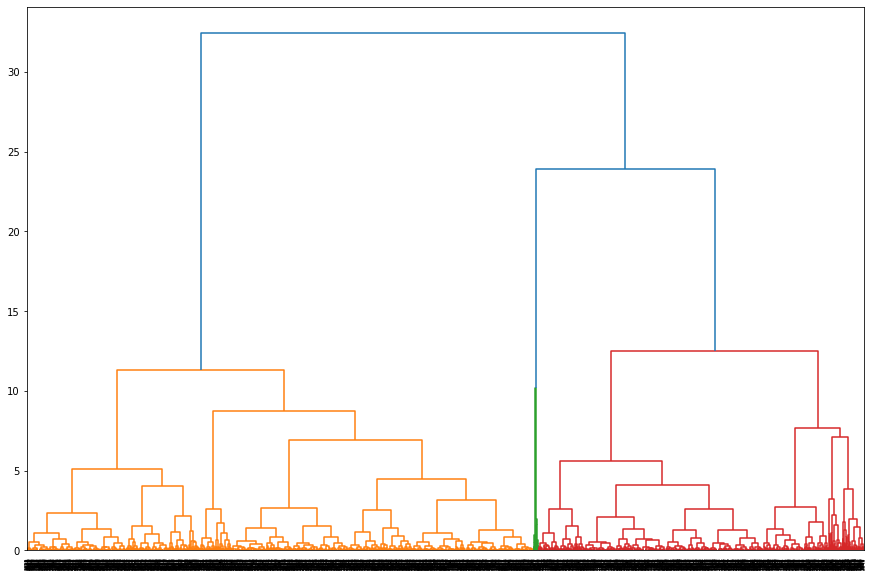

In [167]:
linkage_data = linkage(node_embeddings['company'].detach().numpy(), method='ward', metric='euclidean')
plt.figure(figsize = (15, 10))
dendrogram(linkage_data)
plt.show()

In [168]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [212]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 300, metric = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit_predict(node_embeddings['company'].detach().numpy())
print('number:', i)
silhouette = silhouette_score(node_embeddings['company'].detach().numpy(), labels)
db_index = davies_bouldin_score(node_embeddings['company'].detach().numpy(), labels)
ch_index = calinski_harabasz_score(node_embeddings['company'].detach().numpy(), labels)
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

number: 952
Silhouette Score: 0.35
Davies-Bouldin Index: 0.67
Calinski-Harabasz Index: 4597.84


In [188]:
silhouette = []
db_index = []
ch_index = []
for i in range(2, 1000, 50):
    hierarchical_cluster = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
    labels = hierarchical_cluster.fit_predict(node_embeddings['company'].detach().numpy())
    # Calculate clustering metrics
    silhouette.append(silhouette_score(node_embeddings['company'].detach().numpy(), labels))
    db_index.append(davies_bouldin_score(node_embeddings['company'].detach().numpy(), labels))
    ch_index.append(calinski_harabasz_score(node_embeddings['company'].detach().numpy(), labels))
# ari = adjusted_rand_score(iris.target, kmeans.labels_)
# mi = mutual_info_score(iris.target, kmeans.labels_)

# # Print the metric scores
# print(f"Silhouette Score: {silhouette:.2f}")
# print(f"Davies-Bouldin Index: {db_index:.2f}")
# print(f"Calinski-Harabasz Index: {ch_index:.2f}")
# # print(f"Adjusted Rand Index: {ari:.2f}")
# # print(f"Mutual Information (MI): {mi:.2f}")


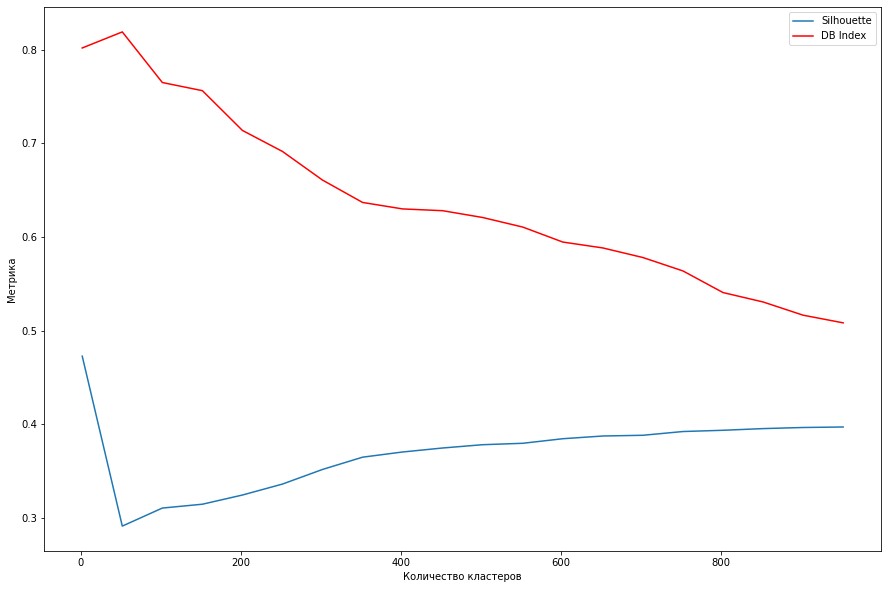

In [193]:
plt.figure(figsize = (15, 10))

plt.plot(np.arange(2, 1000, 50), silhouette, label = 'Silhouette')
plt.plot(np.arange(2, 1000, 50), db_index, c = 'r', label = 'DB Index')
plt.xlabel('Количество кластеров')
plt.ylabel('Метрика')
plt.legend()
plt.show()

In [93]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(node_embeddings['company'].detach().numpy())

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [94]:
# Calculate clustering metrics
silhouette = silhouette_score(node_embeddings['company'].detach().numpy(), kmeans.labels_)
db_index = davies_bouldin_score(node_embeddings['company'].detach().numpy(), kmeans.labels_)
ch_index = calinski_harabasz_score(node_embeddings['company'].detach().numpy(), kmeans.labels_)
# ari = adjusted_rand_score(iris.target, kmeans.labels_)
# mi = mutual_info_score(iris.target, kmeans.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
# print(f"Adjusted Rand Index: {ari:.2f}")
# print(f"Mutual Information (MI): {mi:.2f}")

Silhouette Score: 0.33
Davies-Bouldin Index: 0.89
Calinski-Harabasz Index: 2529.54


In [153]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 3, min_samples = 300).fit(node_embeddings['company'].detach().numpy())
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
# Calculate clustering metrics
silhouette = silhouette_score(node_embeddings['company'].detach().numpy(), clustering.labels_)
db_index = davies_bouldin_score(node_embeddings['company'].detach().numpy(), clustering.labels_)
ch_index = calinski_harabasz_score(node_embeddings['company'].detach().numpy(), clustering.labels_)
# ari = adjusted_rand_score(iris.target, kmeans.labels_)
# mi = mutual_info_score(iris.target, kmeans.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
# print(f"Adjusted Rand Index: {ari:.2f}")
# print(f"Mutual Information (MI): {mi:.2f}")

Silhouette Score: 0.88
Davies-Bouldin Index: 0.15
Calinski-Harabasz Index: 428.03


In [213]:
df['label'] = labels

In [144]:
df = pd.read_excel('datafinalll2.xlsx')

In [207]:
df['label']

0        78
1       122
2       198
3       181
4       117
       ... 
3140     81
3141     19
3142    129
3143     57
3144    172
Name: label, Length: 3145, dtype: int64

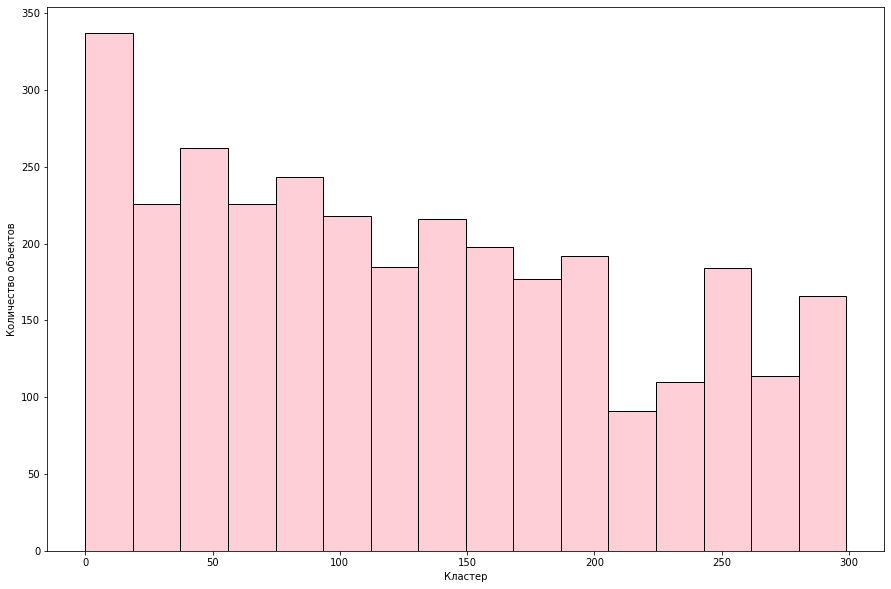

In [222]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['label'], color = 'pink', ax = ax)
plt.xlabel('Кластер')
plt.ylabel('Количество объектов')
plt.show()

In [279]:
meann = df.groupby('label').median()
meann['Уставный капитал']

label
0      3814978.5
1        20000.0
2       850000.0
3      1000000.0
4        75000.0
         ...    
295    1014990.5
296     100000.0
297     100000.0
298      25718.0
299     650000.0
Name: Уставный капитал, Length: 300, dtype: float64

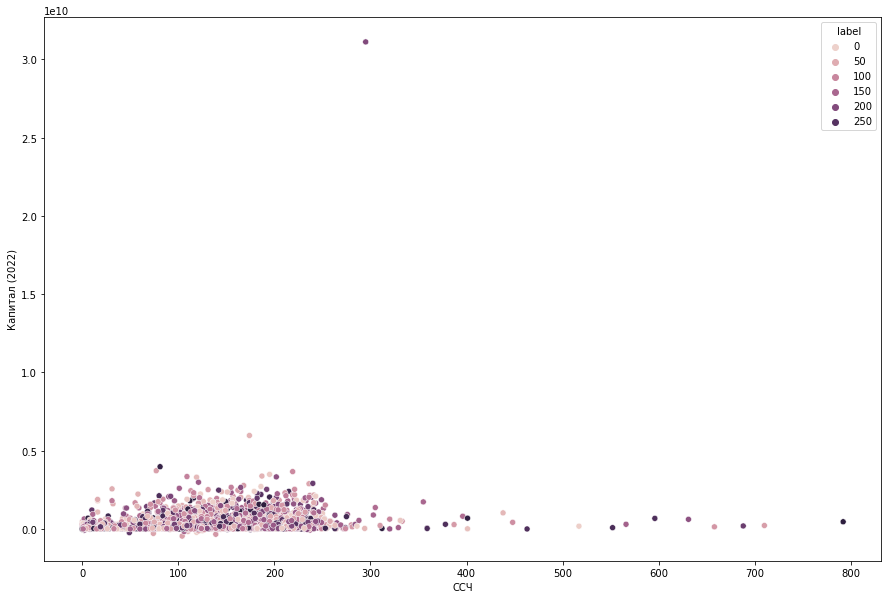

In [292]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data = df, x = 'ССЧ', y = 'Капитал (2022)', hue = 'label')
# plt.xlabel('Кластер')
# plt.ylabel('Средняя ССЧ по кластеру')
plt.show()

In [364]:
df['Регион'].loc[df['label']==1]

173           Приморский край
192       Ставропольский край
206       Ставропольский край
357     Ленинградская область
457        Мурманская область
460        Мурманская область
684         Самарская область
1063                   Москва
1072     Владимирская область
1081                   Москва
1639        Самарская область
1706          Курская область
1961        Самарская область
2196       Пензенская область
2871       Ростовская область
Name: Регион, dtype: object

In [508]:
df = pd.read_csv('hetero_dataset/edges_0.csv')

In [510]:
net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#222222",
                font_color = "white",
                height = "750px",
                width = "100%",
)
nodes = list(set([*df.src_id, *df.dst_id]))
edges = df.values.tolist()
net.add_nodes(nodes)
net.add_edges(edges)
net.show("graph.html")

graph.html
